### Hand Written Digit Recognition

#### The given dataset exist at https://www.kaggle.com/dillsunnyb11/digit-recognizer/tasks. It consists of two files namely the test set and the training set. Let us start with the ML task below. 

In [1]:
#making necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Importing the Data

train_data = pd.read_csv('Handwritten Digits Dataset/train.csv')
test_data = pd.read_csv('Handwritten Digits Dataset/test.csv')

In [3]:
#visualising training data

train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#visualisiing test data

test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#shape of training data

train_data.shape

(42000, 785)

In [6]:
#shape of test data

test_data.shape

(28000, 784)

#### Upon visualizing the training and test datasets, we can see the structure of the data. The training dataset consists of 42000 entries with 784 pixel values for each entry, leading to a 28 X 28 pixel image. Each entry has it's own label which can be used during the training. The test dataset  consists of 28000 entires, with 784 pixel values for each entry, leading to a 28 X 28 pixel image

In [7]:
# Collecting the Labels and the pixel values

labels = np.array(train_data['label'])

train_data = train_data.drop('label', axis = 1)

In [8]:
#Converting the pixel values of both train and test data into a list of shape (42000, 784) and (28000, 784) respectively

train_data_pixels = []
for i in range(0, len(train_data)):
    train_data_pixels.append(train_data.iloc[i].tolist())
    
test_data_pixels = []
for i in range(0, len(test_data)):
    test_data_pixels.append(test_data.iloc[i].tolist())

In [9]:
# Converting the train and test list to a numpy array for convenience.


train_data_pixels = np.asarray(train_data_pixels)
test_data_pixels = np.asarray(test_data_pixels)

In [10]:
#Creating a split on the test data to measure accuracy

X_train, X_test, y_train, y_test = train_test_split(train_data_pixels, labels, random_state=0)

In [11]:
#Creating a Random Forest Classifier with n_estimators = 20 and max_depth = 10 and fitting training data to it.

rfc = RandomForestClassifier(n_estimators = 20, max_depth = 10).fit(X_train, y_train)

In [12]:
#Creating a Support Vector Machine Classifier and fitting training data to it

svm = SVC().fit(X_train, y_train)

In [13]:
#predicting values for X_train

rfc_predicted_training = rfc.predict(X_train)
svm_predicted_training = svm.predict(X_train)

In [14]:
#measuring training data accuracy for Random Forest Classifier

accuracy_score(y_train, rfc_predicted_training)

0.9680952380952381

In [15]:
#measuring training data accuracy for Support Vector Machine Classifier

accuracy_score(y_train, svm_predicted_training)

0.9891428571428571

In [16]:
#predicting values for X_test

rfc_predicted_testing = rfc.predict(X_test)
svm_predicted_testing = svm.predict(X_test)

In [17]:
#measuring testing data accuracy for Random Forest Classifier, we can see that model is not overfitting

accuracy_score(y_test, rfc_predicted_testing)

0.9362857142857143

In [18]:
#measuring testing data accuracy for Support Vector Machine Classifier, we can see that model is not overfitting

accuracy_score(y_test, svm_predicted_testing)

0.9748571428571429

#### In both the cases of the Support Vector Machine and the Random Forest Classifier, we see that the training set has an accuracy of 98.91% and 96.80% for the Support Vector Machine and the Random Forest Classifier respectively, and the test set has an accuracy of 97.48%and 93.63% for the for the Support Vector Machine and the Random Forest Classifier respectively. This is conclusive evidence that our model with these parameters is not overfitting on the test data.

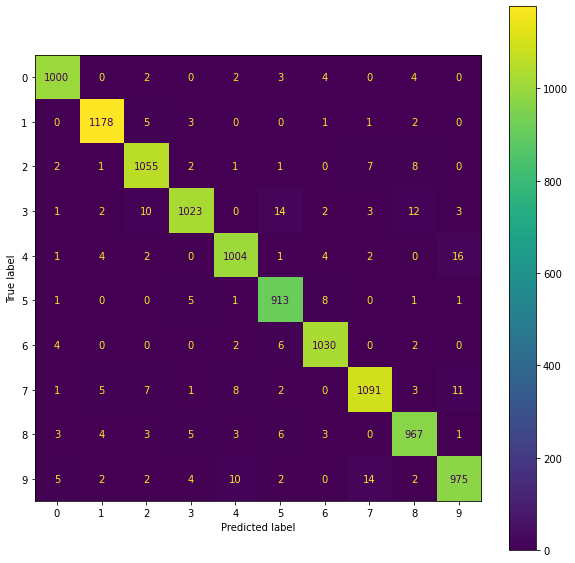

In [19]:
#Confusion matrix for the SVM
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(svm, X_test, y_test, ax = ax)  

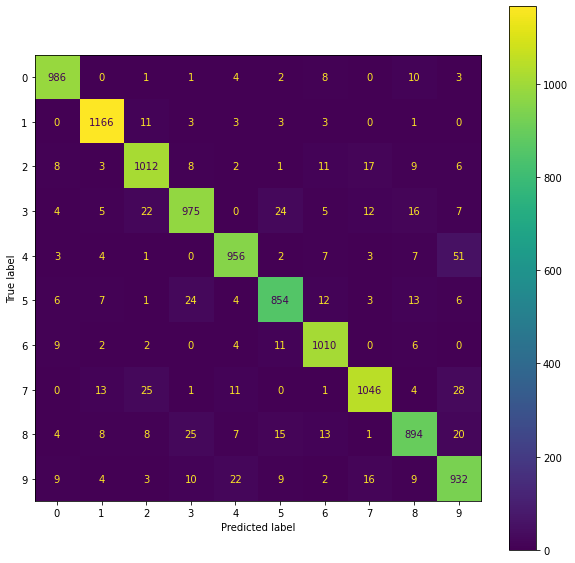

In [20]:
#Confusion matrix for the RFC
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rfc, X_test, y_test, ax = ax)  

### Upon viewing the accuracy score and the confusion matrix, it becomes evident that the Support Vector Machine perfomed much better on the training and test set than the Random Forest Classifier. 

#### Now, we can introduce data from our test dataset to check the perfomance of the model on unseen data.

In [21]:
#Making our own Digits from test.csv and predicting the values using Random Forest Classifier

print(rfc.predict(test_data_pixels[756].reshape(1, -1)))

[7]


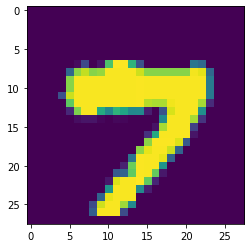

In [22]:
#visualizing the digit from test.csv

plt.imshow(test_data_pixels[756].reshape(28,28))

In [23]:
#Making our own Digits from test.csv and predicting the values using Support Vector Machine Classifier

print(svm.predict(test_data_pixels[2534].reshape(1, -1)))

[9]


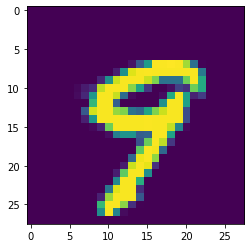

In [24]:
#visualizing the digit from test.csv

plt.imshow(test_data_pixels[2534].reshape(28,28))